In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [5]:
def n(x):
    # The real function to estimate
    return (1.0 - np.exp(-5.0 * x)) * 100


def generate_observations(x, noise_std):
    return n(x) + np.random.normal(0, noise_std, size=n(x).shape)

In [6]:
n_obs = 50
bids = np.linspace(0.0, 1.0, 20)
x_obs = np.array([])
y_obs = np.array([])

noise_std = 5.0

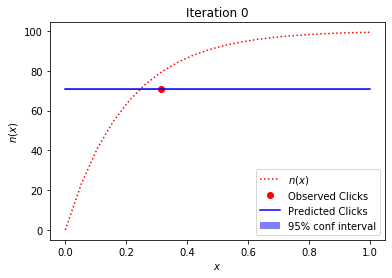

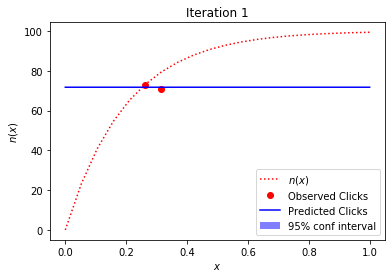

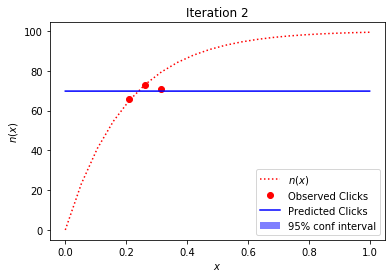

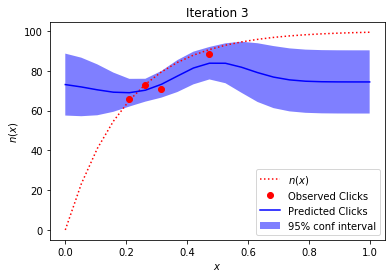

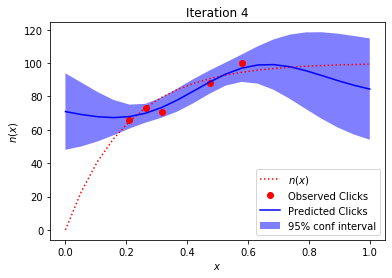

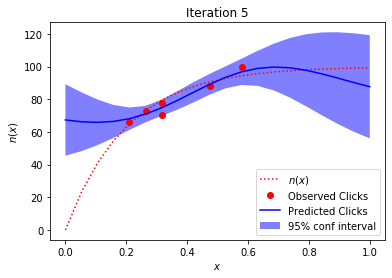

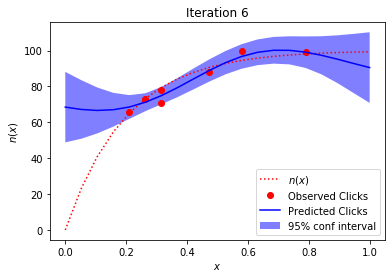

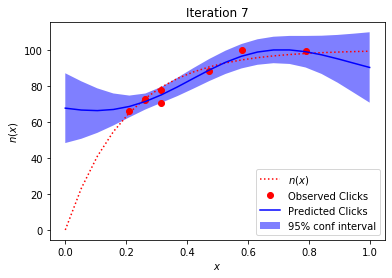

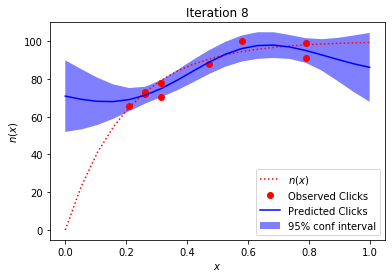

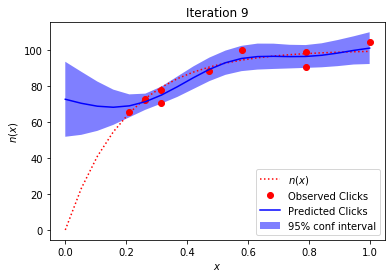

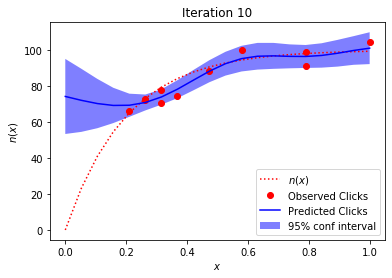

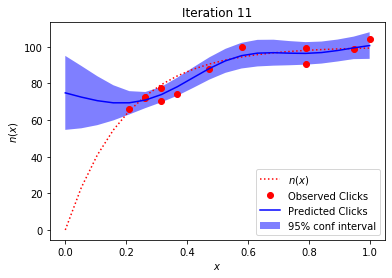

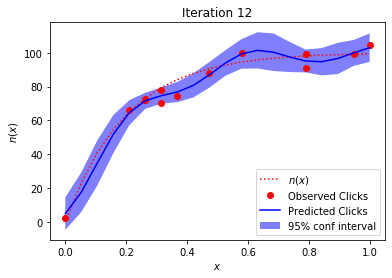

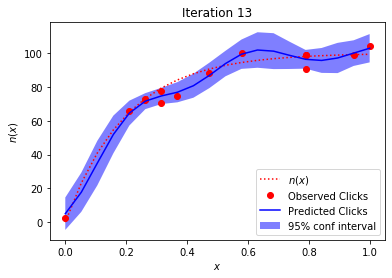

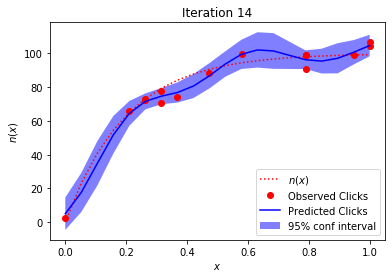

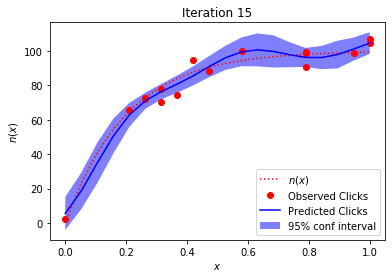

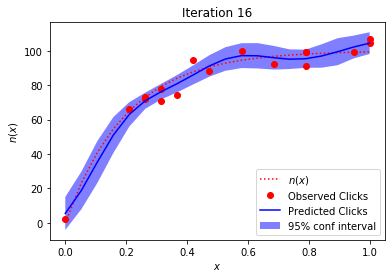

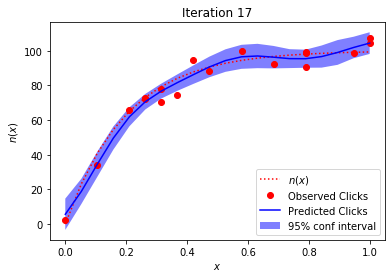

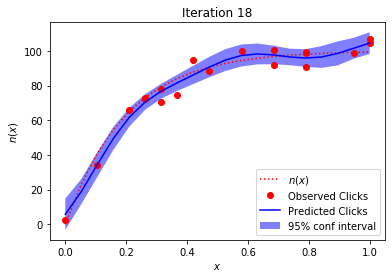

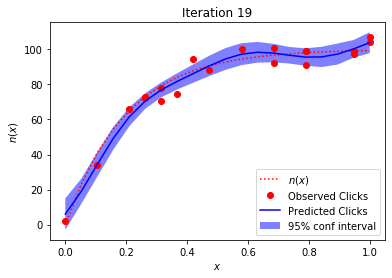

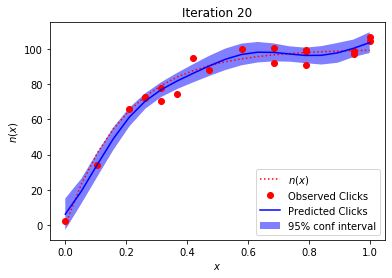

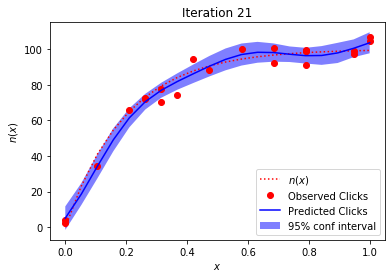

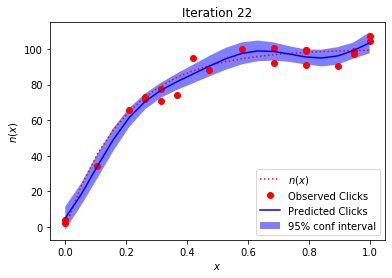

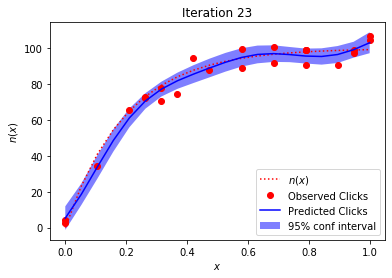

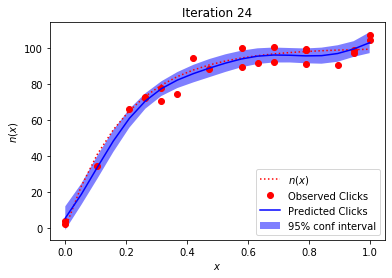

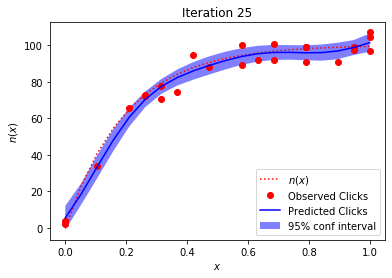

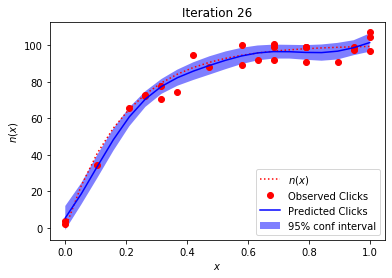

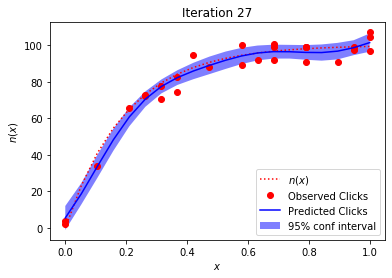

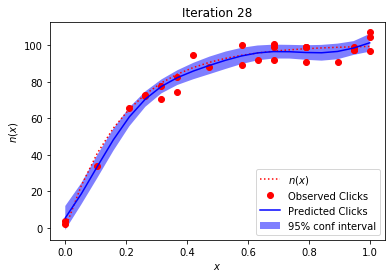

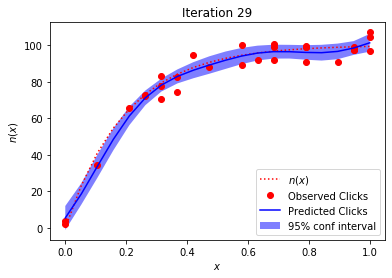

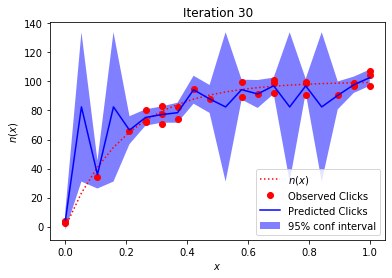

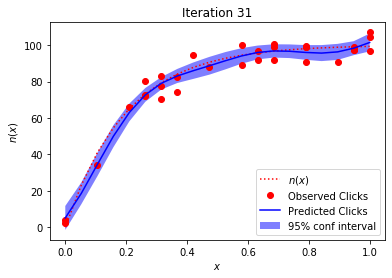

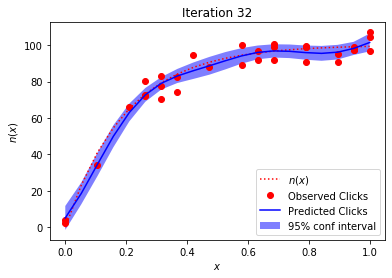

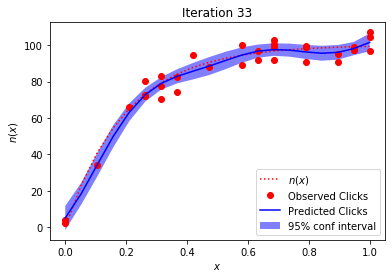

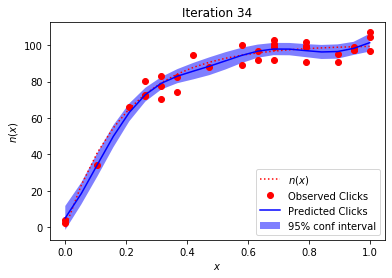

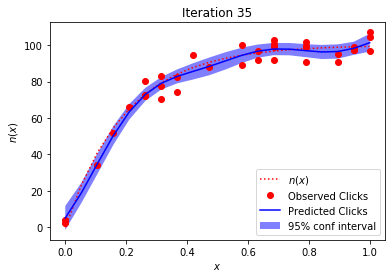

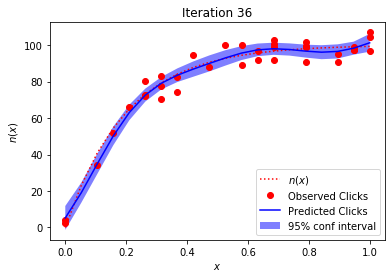

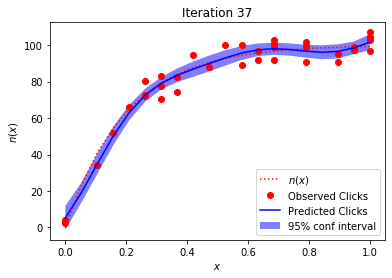

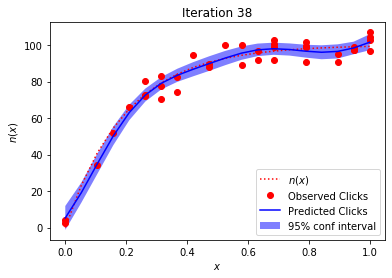

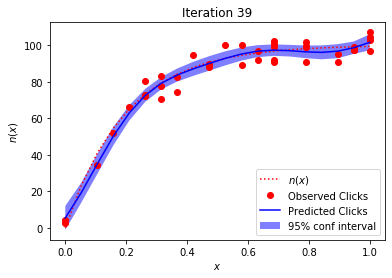

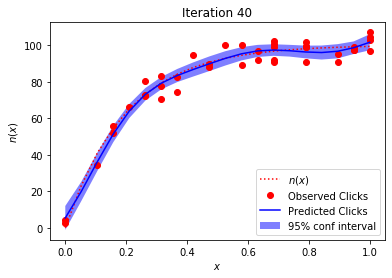

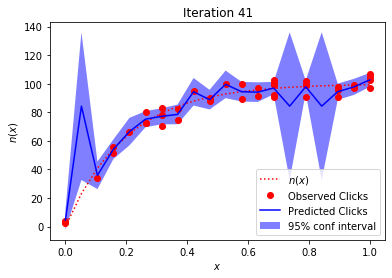

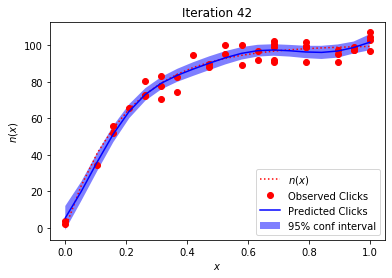

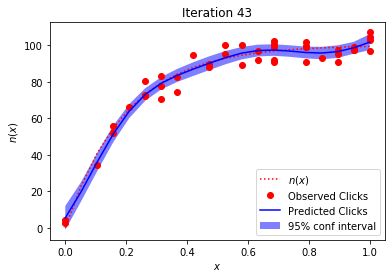

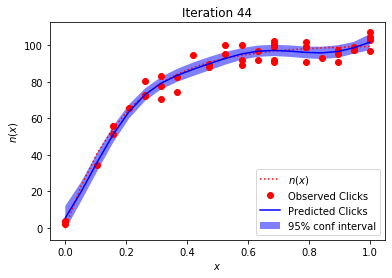

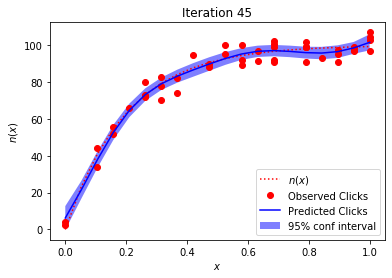

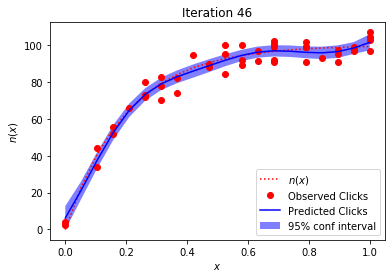

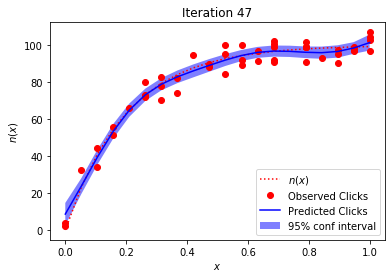

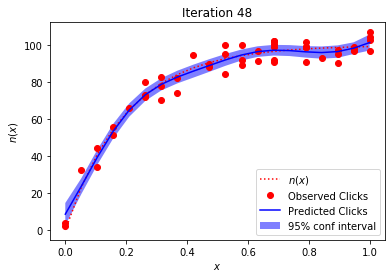

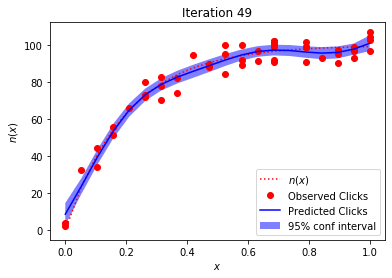

In [7]:
for i in range(0, n_obs):
    
    new_x_obs = np.random.choice(bids, 1)
    new_y_obs = generate_observations(new_x_obs, noise_std)
    
    x_obs = np.append(x_obs, new_x_obs)
    y_obs = np.append(y_obs, new_y_obs)
    
    X = np.atleast_2d(x_obs).T
    Y = y_obs.ravel()
    
    theta = 1.0
    l = 1.0
    kernel = C(theta, (1e-3, 1e3)) * RBF(1, (1e-3, 1e3))
    gp = GaussianProcessRegressor(kernel=kernel,
                                  alpha=noise_std ** 2,
                                  normalize_y=True,
                                  n_restarts_optimizer=10)
    
    gp.fit(X, Y)
    
    x_pred = np.atleast_2d(bids).T
    y_pred, sigma = gp.predict(x_pred, return_std=True)
    
    plt.figure(i)
    plt.title(f'Iteration {i}')
    plt.plot(x_pred, n(x_pred), 'r:', label=r'$n(x)$')
    plt.plot(X.ravel(), Y, 'ro', label=r'Observed Clicks')
    plt.plot(x_pred, y_pred, 'b-', label=r'Predicted Clicks')
    plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
             np.concatenate([y_pred - 1.96 * sigma, (y_pred + 1.96 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% conf interval')
    plt.xlabel('$x$')
    plt.ylabel('$n(x)$')
    plt.legend(loc='lower right')
    plt.show()
    
